SALES FORCASTING - PROBLEM 2

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

import pickle 
import os
from os import path
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [111]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Data Preprocessing and Cleaning

Reading all datasets for a basic understanding

In [112]:
features = pd.read_csv(r"D:\Coding\001 Final Project\ZenML Batches Final Projects\Data\Sales Forecasting\features.csv")
stores = pd.read_csv(r"D:\Coding\001 Final Project\ZenML Batches Final Projects\Data\Sales Forecasting\stores.csv")
data = pd.read_csv(r"D:\Coding\001 Final Project\ZenML Batches Final Projects\Data\Sales Forecasting\train.csv")
test = pd.read_csv(r"D:\Coding\001 Final Project\ZenML Batches Final Projects\Data\Sales Forecasting\test.csv")

In [113]:
# Display the basic information of train
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [114]:
# Display the first few rows of the dataset
print(data.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [115]:
# Display summary statistics of numerical columns
print(data.describe())

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


In [116]:
print(data.shape)

(421570, 5)


In [117]:
print(data.tail())

        Store  Dept        Date  Weekly_Sales  IsHoliday
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False


In [118]:
# Display the basic information of stores
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [119]:
# Display the first few rows of the dataset
print(stores.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [120]:
# Display summary statistics of numerical columns
print(stores.describe())

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [121]:
print(stores.shape)

(45, 3)


In [122]:
print(stores.tail())

    Store Type    Size
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221


In [123]:
# Display the basic information of features
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [124]:
# Display the first few rows of the dataset
print(features.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [125]:
# Display summary statistics of numerical columns
print(features.describe())

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

In [126]:
print(features.shape)

(8190, 12)


In [127]:
print(features.tail())

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment  IsHoliday  
8185       3.00    2449.97    3169.69  NaN           NaN      False  
8186     582.74    5797.47    1514.93  NaN           NaN      False  
8187      85.72     744.84    2150.36  NaN           NaN      False  
8188     204.19     363.00    1059.46  NaN           NaN      False  
8189       2.06      10.88    1864.57  NaN           NaN      False  


#### HANDLING MISSING VALUES

In [128]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [129]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [130]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [131]:
# Check for missing values
print(features.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [132]:
data = pd.merge(data,stores,on='Store',how='left')

In [133]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [134]:
data['Date'] = pd.to_datetime(data['Date'])

In [135]:
data.sort_values(by=['Date'],inplace=True)

In [136]:
data.set_index(data.Date, inplace=True)

In [137]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [138]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [139]:
# Check for missing values
print(data.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [140]:
print(data.head())

            Store  Dept       Date  Weekly_Sales Type    Size  Temperature  \
Date                                                                         
2010-02-05      1     1 2010-02-05      24924.50    A  151315        42.31   
2010-02-05     29     5 2010-02-05      15552.08    B   93638        24.36   
2010-02-05     29     6 2010-02-05       3200.22    B   93638        24.36   
2010-02-05     29     7 2010-02-05      10820.05    B   93638        24.36   
2010-02-05     29     8 2010-02-05      20055.64    B   93638        24.36   

            Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Date                                                                            
2010-02-05       2.572        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0    

In [141]:
data['Year'] = data['Date'].dt.year.astype('int')
data['Month'] = data['Date'].dt.month.astype('int')
data['Week'] = data['Date'].dt.isocalendar().week.astype('int')

In [142]:
print(data.head())

            Store  Dept       Date  Weekly_Sales Type    Size  Temperature  \
Date                                                                         
2010-02-05      1     1 2010-02-05      24924.50    A  151315        42.31   
2010-02-05     29     5 2010-02-05      15552.08    B   93638        24.36   
2010-02-05     29     6 2010-02-05       3200.22    B   93638        24.36   
2010-02-05     29     7 2010-02-05      10820.05    B   93638        24.36   
2010-02-05     29     8 2010-02-05      20055.64    B   93638        24.36   

            Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Date                                                                            
2010-02-05       2.572        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0    

### EXPLORATORY DATA ANALYSIS

In [143]:
# Summary statistics of numerical features
print(data.describe())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375360   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  14

OUTLIERS

In [147]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store     0
Dept      0
max       0
min       0
mean      0
median    0
std       0
dtype: int64

In [148]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [149]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,max_x,min_x,mean_x,median_x,std_x,max_y,min_y,mean_y,median_y,std_y
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,57592.12,14537.37,22513.322937,18535.48,9854.349032,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,766.93,-9.92,372.655556,371.05,290.954675,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,2512.14,110.56,876.629441,824.04,307.436056,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,11990.43,7414.43,9188.915105,9161.97,756.223236,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,29166.26,4791.74,8607.050490,7571.60,3874.176095,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [153]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

KeyError: 'MarkDown1'

In [154]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [155]:
data.shape

(421533, 25)

In [156]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
print(data.shape)

(375438, 25)


In [157]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375438 entries, 2010-02-05 to 2012-10-26
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           375438 non-null  int64         
 1   Dept            375438 non-null  int64         
 2   Date            375438 non-null  datetime64[ns]
 3   Weekly_Sales    375438 non-null  float64       
 4   Type            375438 non-null  object        
 5   Size            375438 non-null  int64         
 6   Temperature     375438 non-null  float64       
 7   Fuel_Price      375438 non-null  float64       
 8   CPI             375438 non-null  float64       
 9   Unemployment    375438 non-null  float64       
 10  IsHoliday       375438 non-null  bool          
 11  Year            375438 non-null  int32         
 12  Month           375438 non-null  int32         
 13  Week            375438 non-null  int32         
 14  max_x           3754

In [158]:
print(data.isnull().sum())

Store             0
Dept              0
Date              0
Weekly_Sales      0
Type              0
Size              0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
IsHoliday         0
Year              0
Month             0
Week              0
max_x             0
min_x             0
mean_x            0
median_x          0
std_x             0
max_y             0
min_y             0
mean_y            0
median_y          0
std_y             0
Total_MarkDown    0
dtype: int64


PLOTS

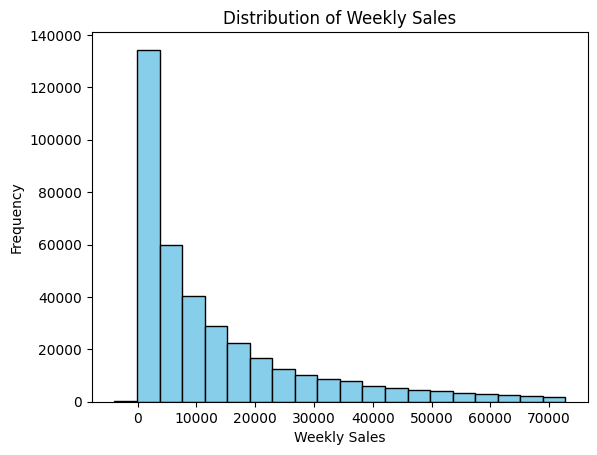

In [159]:
plt.hist(data['Weekly_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

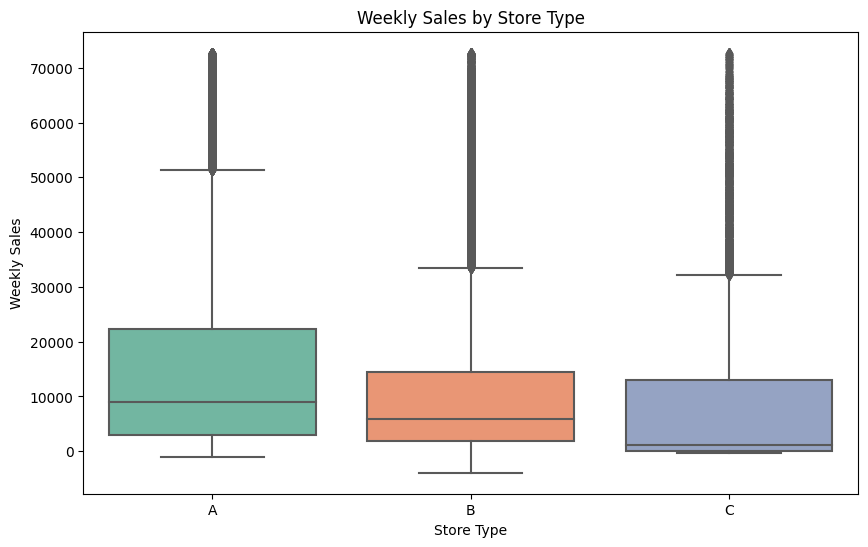

In [161]:
#BOX PLOT
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=data, palette='Set2')
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


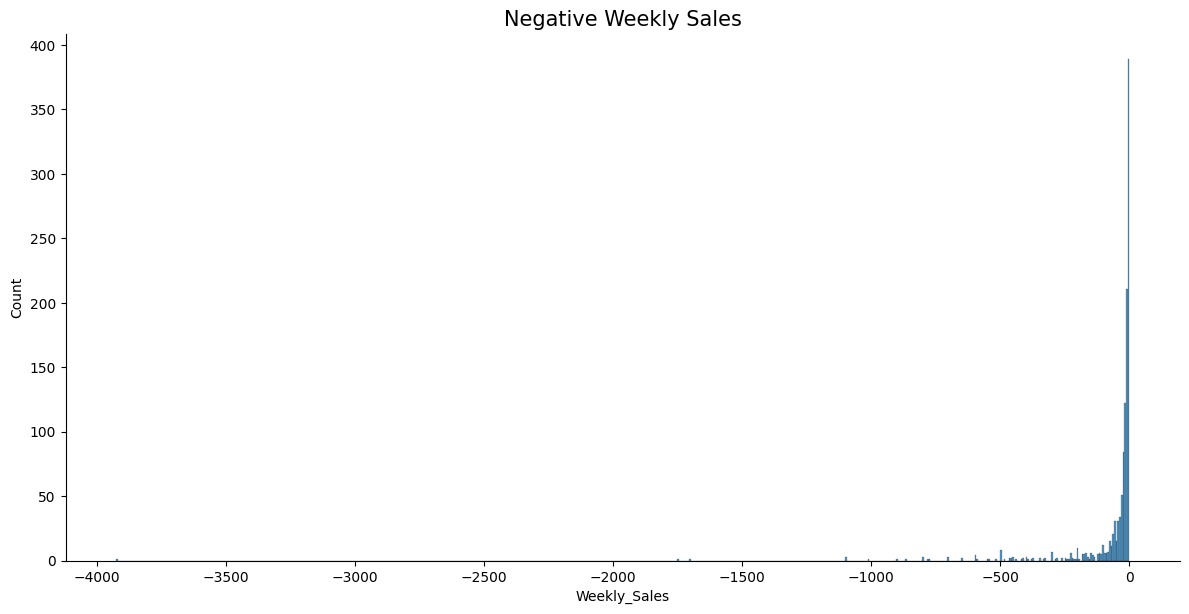

In [162]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

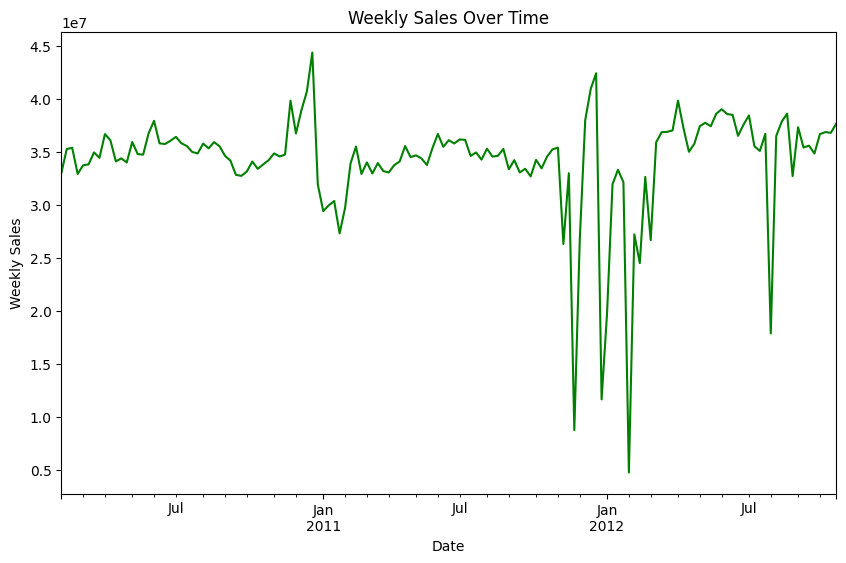

In [163]:
plt.figure(figsize=(10, 6))
data.groupby(data.index)['Weekly_Sales'].sum().plot(color='green')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

In [165]:
import os

# Create the directory if it doesn't exist
directory = './datasets'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file in the datasets directory
data.to_csv(os.path.join(directory, 'preprocessed_walmart_dataset.csv'))

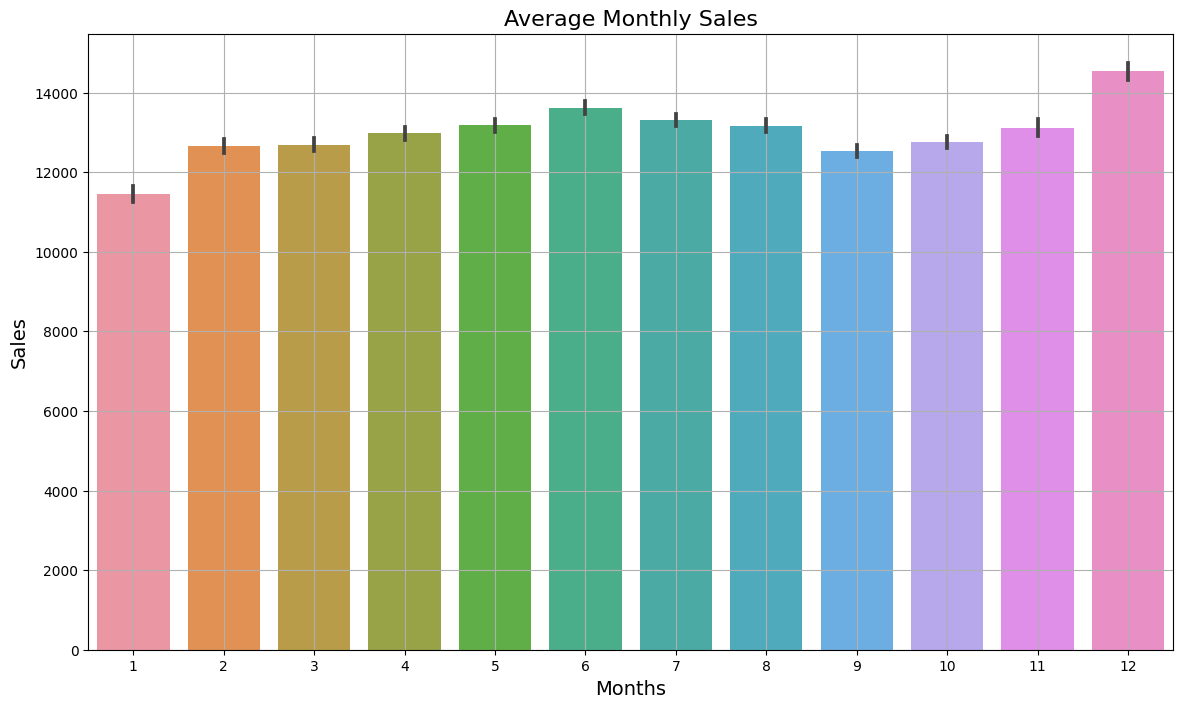

In [166]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [167]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365956e+08,1.369952e+08,1.753236e+08,1.422670e+08,1.455762e+08,1.776929e+08,1.426161e+08,1.344116e+08,1.687424e+08,1.440427e+08,1.927239e+08
2011,1.170799e+08,1.320975e+08,1.341566e+08,1.710159e+08,1.382090e+08,1.441166e+08,1.762010e+08,1.398121e+08,1.667957e+08,1.375262e+08,1.034897e+08,1.597494e+08
2012,1.172205e+08,8.915179e+07,1.734208e+08,1.479204e+08,1.512255e+08,1.902318e+08,1.458203e+08,1.636001e+08,1.432203e+08,1.480526e+08,NaN,NaN


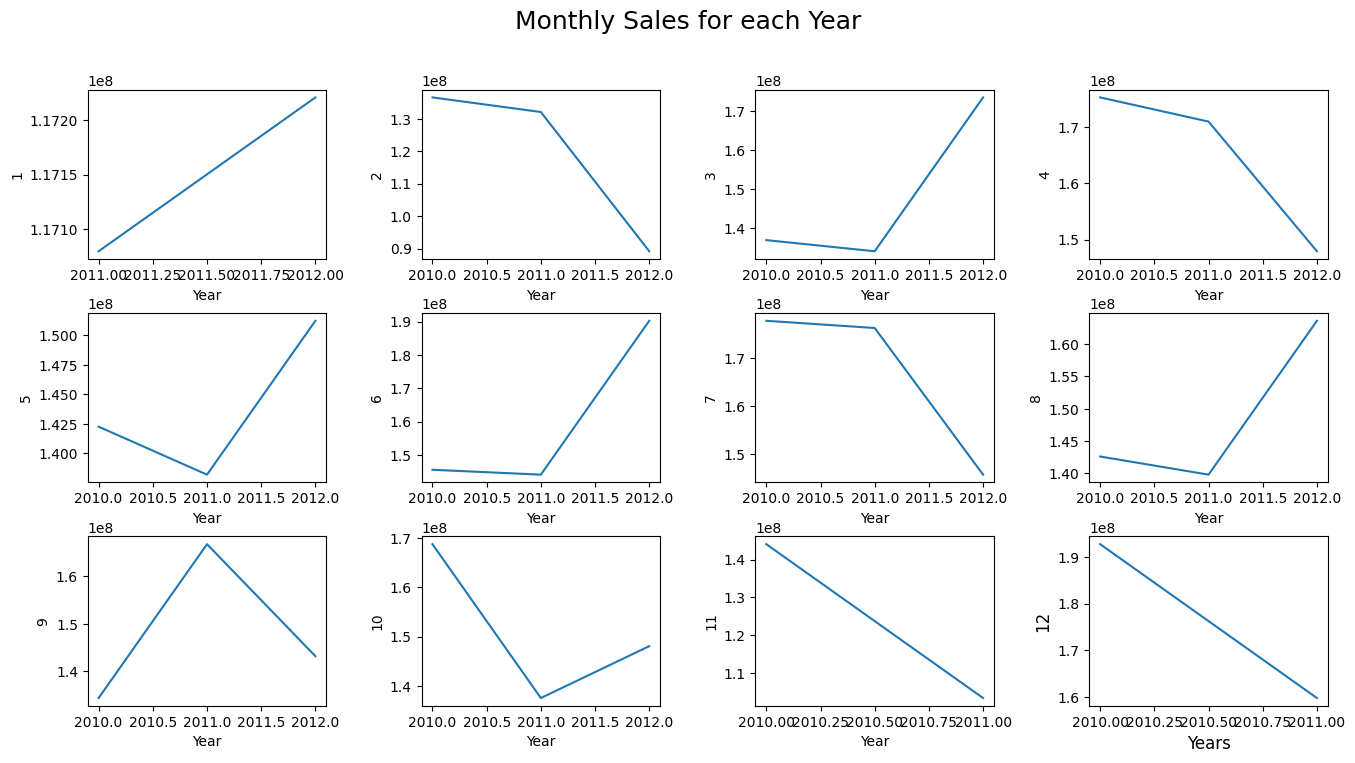

In [168]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

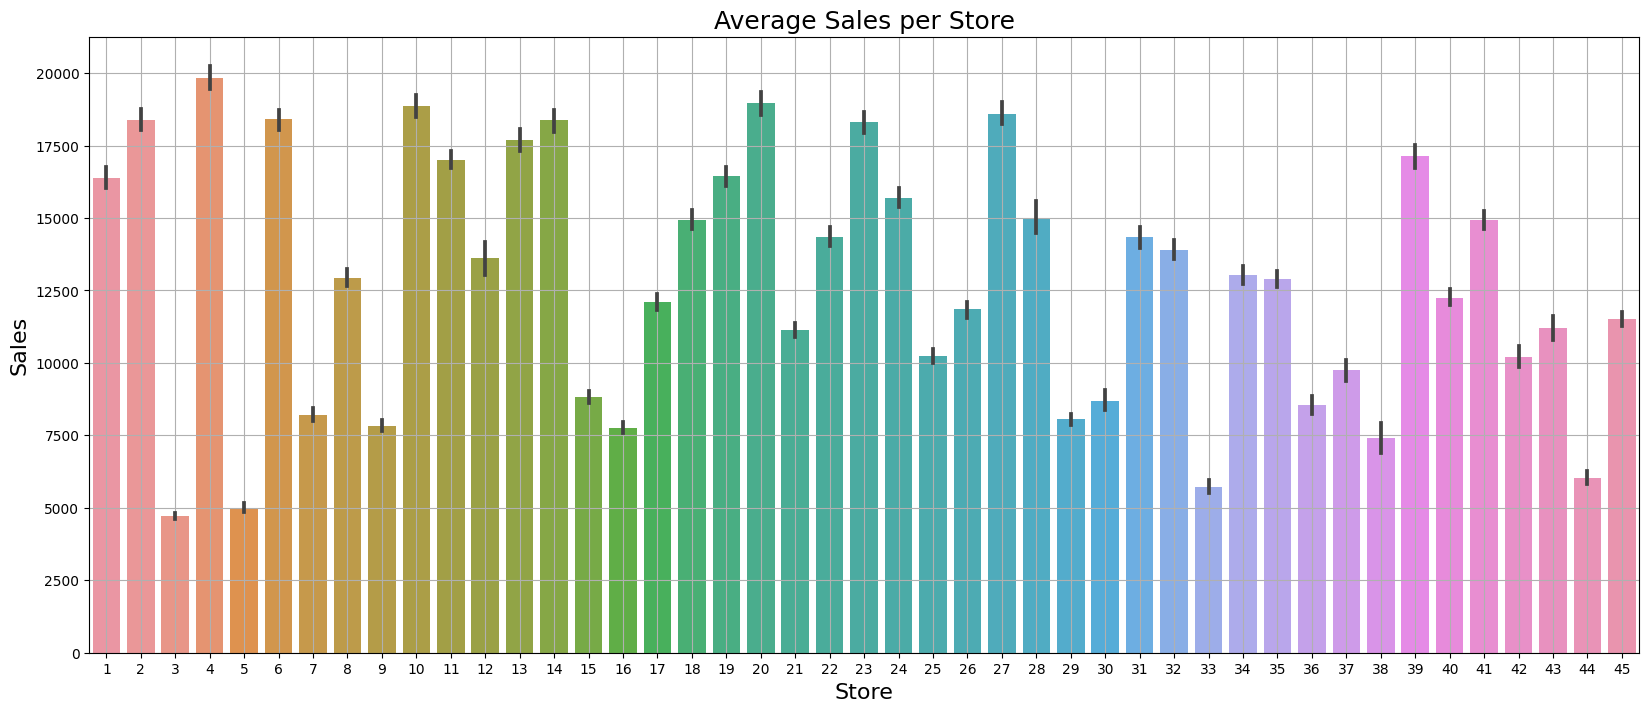

In [169]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

In [170]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [171]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [172]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [173]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [174]:
data.shape

(375438, 25)

In [175]:
data = pd.concat([data, data_cat],axis=1)

In [176]:
data.shape

(375438, 154)

In [177]:
data.drop(columns=cat_col,inplace=True)

In [178]:
data.drop(columns=['Date'],inplace=True)

In [179]:
data.shape

(375438, 150)

In [196]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'max_x', 'max_y', 'mean_x', 'mean_y', 'median_x', 'median_y', 'min_x',
       'min_y', 'std_x', 'std_y'],
      dtype='object', length=149)

In [197]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [206]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,mean_y,2.802508e-01
1,2,median_y,2.763069e-01
2,3,mean_x,2.105567e-01
3,4,median_x,1.609467e-01
4,5,Week,2.003172e-02
...,...,...,...
144,145,Dept_51,2.412130e-10
145,146,Dept_45,1.687310e-10
146,147,Dept_78,5.427573e-12
147,148,Dept_39,3.779994e-14


In [207]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['mean_y', 'median_y', 'mean_x', 'median_x', 'Week', 'Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'max_y', 'max_x', 'min_x', 'min_y', 'Month', 'Total_MarkDown', 'std_x', 'std_y', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Year']


In [208]:
X = data[x]
Y = data['Weekly_Sales']

In [209]:
data = pd.concat([X,Y],axis=1)

In [210]:
data

,mean_y,median_y,mean_x,median_x,Week,Temperature,CPI,Fuel_Price,Unemployment,max_y,...,Total_MarkDown,std_x,std_y,Dept_16,Dept_18,IsHoliday,Dept_3,Size,Year,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,22513.322937,18535.480,22513.322937,18535.480,5,42.31,211.096358,2.572,8.106,57592.12,...,0.00,9854.349032,9854.349032,False,False,False,False,151315,2010,24924.50
2010-02-05,372.655556,371.050,372.655556,371.050,5,38.01,214.655459,2.572,6.415,766.93,...,0.00,290.954675,290.954675,False,False,False,False,125833,2010,668.48
2010-02-05,876.629441,824.040,876.629441,824.040,5,38.01,214.655459,2.572,6.415,2512.14,...,0.00,307.436056,307.436056,False,False,False,False,125833,2010,693.87
2010-02-05,9188.915105,9161.970,9188.915105,9161.970,5,34.14,214.471451,2.572,6.299,11990.43,...,0.00,756.223236,756.223236,False,False,False,False,155078,2010,8654.60
2010-02-05,8607.050490,7571.600,8607.050490,7571.600,5,38.01,214.655459,2.572,6.415,29166.26,...,0.00,3874.176095,3874.176095,False,False,False,False,125833,2010,11123.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,9347.725105,8762.990,9347.725105,8762.990,43,69.79,223.078337,3.506,6.170,19679.04,...,9678.80,2825.107609,2825.107609,False,False,False,False,202307,2012,9258.88
2012-10-26,37.848679,31.365,37.848679,31.365,43,65.95,131.193097,4.301,10.199,289.78,...,502.88,34.065601,34.065601,False,False,False,False,39690,2012,53.12
2012-10-26,7730.729091,6798.780,7730.729091,6798.780,43,58.99,142.762411,4.071,8.000,41005.33,...,10969.27,5178.928257,5178.928257,False,False,False,False,204184,2012,5339.65


In [212]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [213]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

In [214]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [215]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [216]:
from sklearn.metrics import r2_score

# Calculate R-squared score
lr_acc = r2_score(y_test, lr.predict(X_test_scaled)) * 100
print("Linear Regression Accuracy - ", lr_acc)

Linear Regression Accuracy -  92.37377284919471


In [217]:
y_pred = lr.predict(X_test_scaled)

In [218]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 2173.5844997539184
MSE 18053784.6048682
RMSE 4248.974535681309
R2 0.9237384051182641


In [219]:
import os

# Define the directory path
directory = "./predictions"

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Create a DataFrame for actual and predicted values
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('./predictions/lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2010-03-12,49961.28,51615.400434
2011-12-16,1144.92,4014.351598
2010-10-08,14831.76,15765.380722
2010-06-25,13854.48,18086.639660
2010-07-23,1.00,345.795644
...,...,...
2010-09-10,4054.00,5852.796576
2010-04-02,18820.06,15209.435841
2012-02-24,1389.23,1026.800989


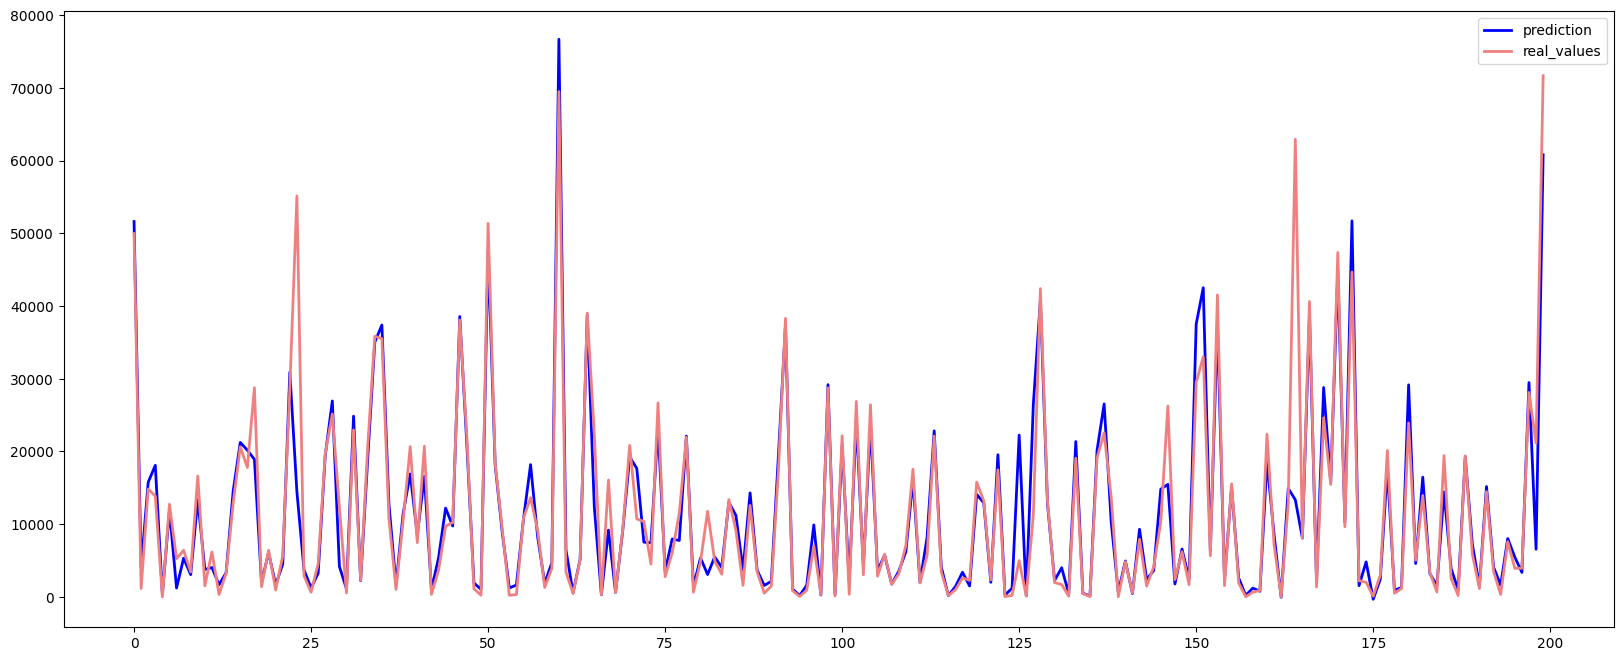

In [220]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [223]:
pkl_filename = "./models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Model already saved


RANDOM FOREST

In [224]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [225]:
rf_acc = rf.score(X_test_scaled,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.9647232556043


In [226]:
y_pred = rf.predict(X_test_scaled)

In [227]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 1118.3710899984019
MSE 4818168.5685479855
RMSE 2195.032703298059
R2 0.9796496932748062


In [228]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2010-03-12,49961.28,48778.2343
2011-12-16,1144.92,1733.4879
2010-10-08,14831.76,14617.9577
2010-06-25,13854.48,14003.1573
2010-07-23,1.00,41.0734
...,...,...
2010-09-10,4054.00,4254.4995
2010-04-02,18820.06,18337.5351
2012-02-24,1389.23,1553.2669


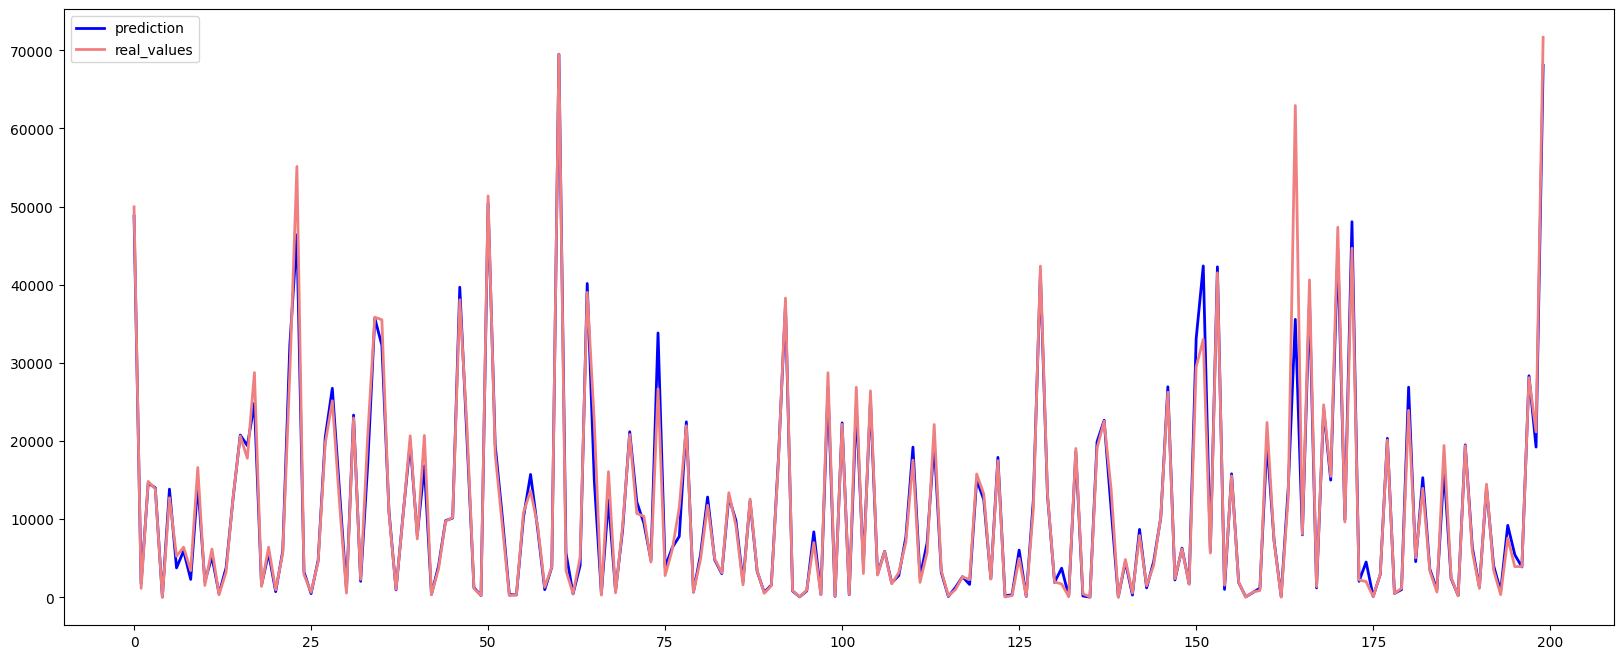

In [229]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [232]:
pkl_filename = "./models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


KNN

In [233]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Example values for n_neighbors
    'weights': ['uniform', 'distance']  # Example values for weights
}

# Create the KNN regressor
knn = KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}


In [234]:
# Evaluate the best model on the test set
mae = metrics.mean_absolute_error(y_test, best_knn.predict(X_test_scaled))
print("Mean Absolute Error on Test Set:", mae)

# Calculate KNeigbhbors Regressor Accuracy
knn_acc = best_knn.score(X_test_scaled, y_test) * 100
print("KNeigbhbors Regressor Accuracy - ", knn_acc)

Mean Absolute Error on Test Set: 1523.968330210896
KNeigbhbors Regressor Accuracy -  96.46051486185856


In [235]:
# Make predictions
y_pred = best_knn.predict(X_test_scaled)

In [236]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1523.968330210896
MSE: 8379123.914423397
RMSE: 2894.6716419005793
R2: 0.9646184585149896


In [237]:
# Create a DataFrame for actual and predicted values
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('./predictions/knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2010-03-12,49961.28,48746.701036
2011-12-16,1144.92,1023.523503
2010-10-08,14831.76,14767.153044
2010-06-25,13854.48,14076.399709
2010-07-23,1.00,132.449470
...,...,...
2010-09-10,4054.00,3929.879743
2010-04-02,18820.06,19368.300310
2012-02-24,1389.23,1675.627474


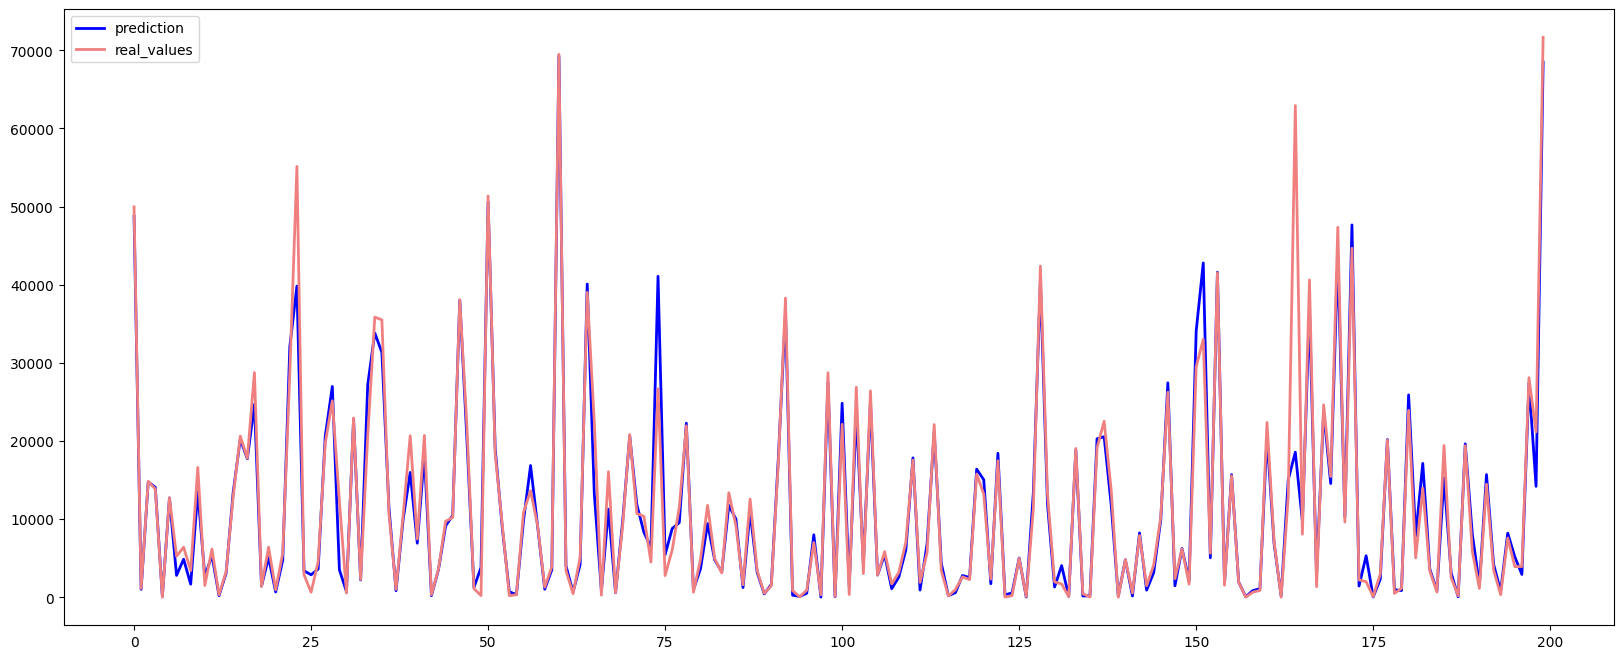

In [238]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20, 8))
plt.plot(best_knn.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.show()

In [239]:
pkl_filename = "./models/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


##### XGboost Regression

In [240]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Example values for n_estimators
    'max_depth': [3, 5, 7],  # Example values for max_depth
    'learning_rate': [0.01, 0.1, 0.2]  # Example values for learning_rate
}

# Create the XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_xgb_reg = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


In [241]:
# Evaluate the best model on the test set
mae = metrics.mean_absolute_error(y_test, best_xgb_reg.predict(X_test_scaled))
print("Mean Absolute Error on Test Set:", mae)

# Calculate XGBoost Regressor Accuracy
xgb_acc = best_xgb_reg.score(X_test_scaled, y_test) * 100
print("XGBoost Regressor Accuracy - ", xgb_acc)

Mean Absolute Error on Test Set: 1387.423932143788
XGBoost Regressor Accuracy -  97.40290549640797


In [242]:
# Make predictions
y_pred = best_xgb_reg.predict(X_test_scaled)

In [243]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1387.423932143788
MSE: 6148175.741314838
RMSE: 2479.5515201977228
R2: 0.9740292535558086


In [244]:
# Create a DataFrame for actual and predicted values
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./predictions/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2010-03-12,49961.28,52952.242188
2011-12-16,1144.92,1622.167725
2010-10-08,14831.76,15028.181641
2010-06-25,13854.48,17154.896484
2010-07-23,1.00,-29.939041
...,...,...
2010-09-10,4054.00,5286.315430
2010-04-02,18820.06,21384.943359
2012-02-24,1389.23,1603.977539


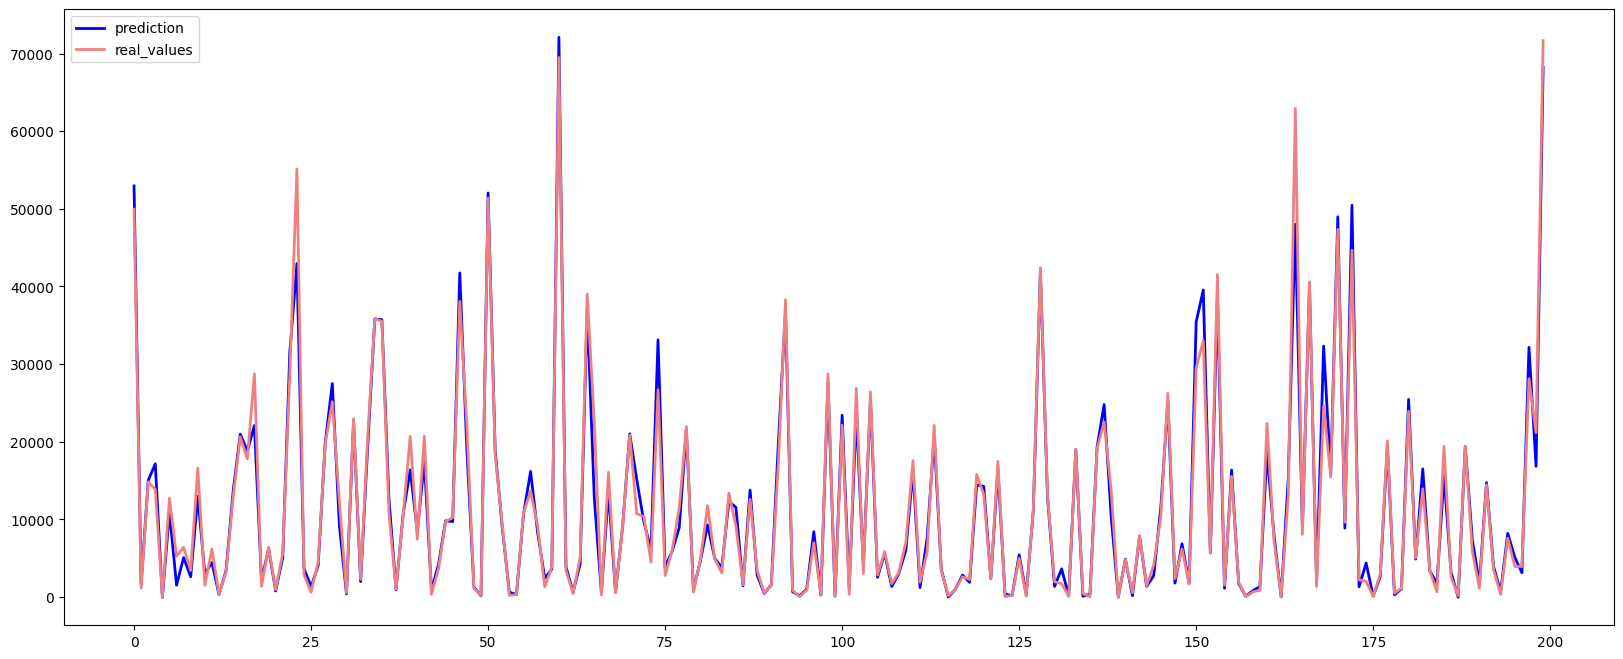

In [245]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20, 8))
plt.plot(best_xgb_reg.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.show()

In [246]:
pkl_filename = "./models/xgboost_regressor.pkl"
if not path.isfile(pkl_filename):
    # Saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
        pickle.dump(best_xgb_reg, file)  
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


In [247]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the custom deep learning neural network
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))  # Added activation function
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

# Create the model
model = create_model()

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=5000)


C:\Users\Rohit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13046.0908 - val_loss: 13034.1602
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13012.3428 - val_loss: 13020.0098
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13062.0195 - val_loss: 12971.3555
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12975.9160 - val_loss: 12869.5986
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12819.2725 - val_loss: 12702.6689
Epoch 6/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12673.5957 - val_loss: 12466.6680
Epoch 7/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12342.7354 - val_loss: 12164.1699
Epoch 8/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12070.0352 - val_loss: 11793.9502
Epoch 9/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 11690.7471 - val_loss: 11342.1416
Epoch 10/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11187.2461 - val_loss: 10778.0498
Epoch 11/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10617.996

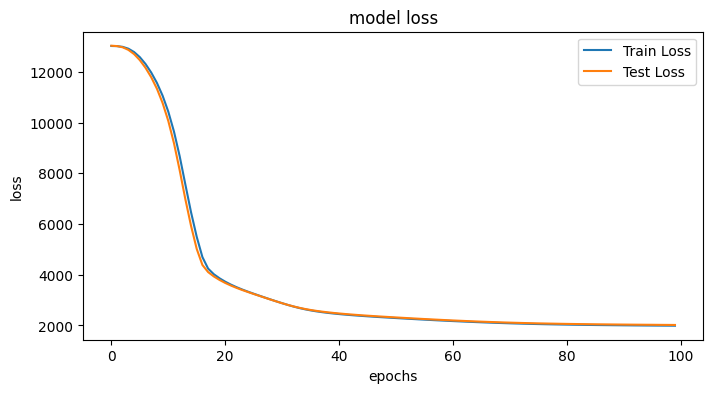

In [248]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [249]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network Accuracy - ",dnn_acc)

Deep Neural Network Accuracy -  97.31523616396959


In [250]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

2347/2347 ━━━━━━━━━━━━━━━━━━━━ 2s 643us/step


In [251]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 1988.5400918854662
MSE: 18568060.209144894
RMSE: 4309.067208705951
R2: 0.9230401382953404


In [252]:
import pandas as pd

# Reshape y_test and y_pred arrays to be 1-dimensional
y_test_1d = y_test.ravel()
y_pred_1d = y_pred.ravel()

# Create DataFrame for actual and predicted values
dnn_df = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})
dnn_df.to_csv('./predictions/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
0,49961.28,51029.484375
1,1144.92,401.387360
2,14831.76,15055.170898
3,13854.48,16586.412109
4,1.00,83.512253
...,...,...
75083,4054.00,5609.589844
75084,18820.06,14401.941406
75085,1389.23,1582.613281
75086,6741.00,8741.554688


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


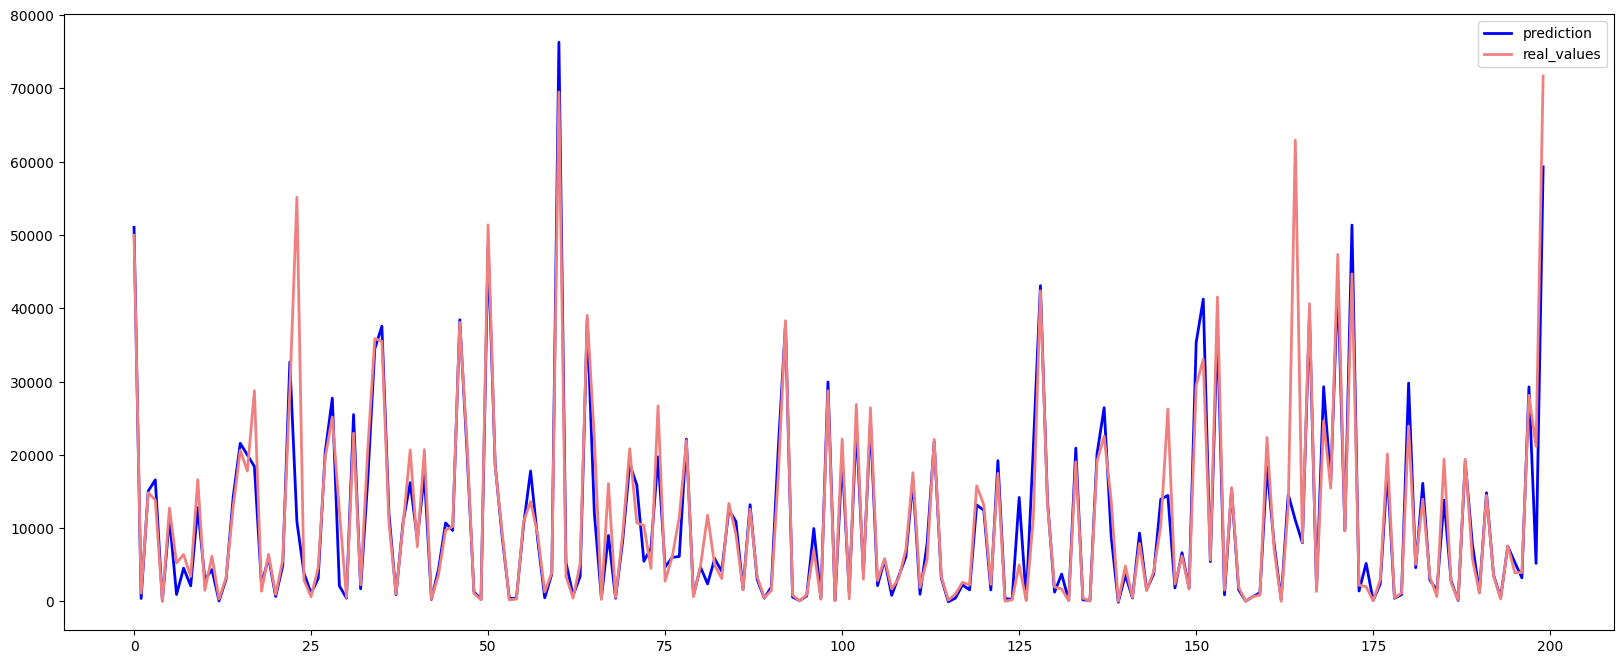

In [253]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20,8))
plt.plot(model.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

In [254]:
filepath = './models/dnn_regressor.json'
weightspath = './models/dnn_regressor.h5'
if not path.isfile(filepath):
    # Serialize model to JSON
    model_json = model.to_json()
    with open(filepath, "w") as json_file:
        json_file.write(model_json)
    print("Saved model to disk")
else:
    print("Model already saved")

Saved model to disk


# Comparison

In [259]:
# Model accuracy data
linear_re = 92.27828803090458
random_forest = 97.91317472830829
knn = 96.26724391234322
xgb = 97.63894312208085
nn = 95.84402068213723

In [260]:
# Create a dictionary with model names and their accuracies
acc = {'model': ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost', 'DNN'],
       'accuracy': [linear_re, random_forest, knn ,xgb , nn ]}

In [261]:
# Convert the dictionary to a DataFrame
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,Linear Regression,92.278288
1,Random Forest,97.913175
2,KNN,96.267244
3,XGBoost,97.638943
4,DNN,95.844021


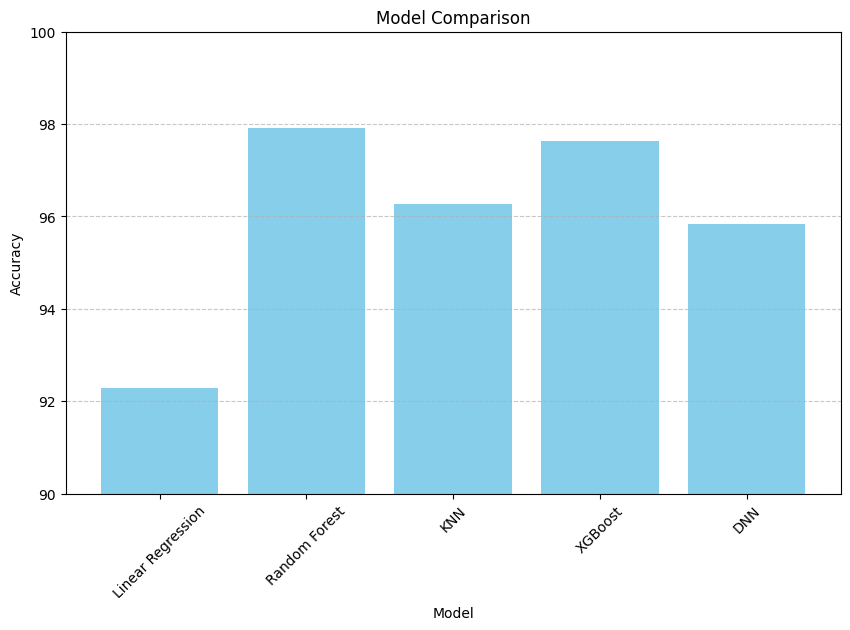

In [262]:
# Plot the model accuracies
plt.figure(figsize=(10, 6))
plt.bar(acc_df['model'], acc_df['accuracy'], color='skyblue')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Random Forest and XGBoost outperform the other models in this comparison, with accuracies over 97%. While KNN and Deep Neural Network (DNN) perform admirably, with roughly 96% accuracy, Linear Regression falls somewhat behind, at around 92%. Overall, Random Forest and XGBoost are the best models based on their better accuracy ratings.